In [1]:
from Bio import SeqIO
import statistics as stats
import array 
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from typing import List
import seaborn as sns
import pandas as pd
import cython

In [36]:
fasta_file = list(SeqIO.parse("genebank_plus_root_renamed.fasta.pep.fasta", format="fasta"))

In [37]:
def check_average_length(fasta: list, decimal_places: int) -> float:
    length: list = []
    for record in fasta:
        length.append(len(record.seq))
        
    if length:
        averageLength: float = stats.mean(length)
        return round(averageLength, decimal_places)
    else:
        return 0
averageLength = check_average_length(fasta=fasta_file, decimal_places=2)
print(averageLength)

336.82


In [38]:
def find_SY_indeces(fasta: list) -> list:
    
    indeces: list = []
    
    for record in fasta:
        index = record.seq.find("PY")
        
        if index != -1:
            indeces.append(index)
    
    return indeces
        
    
sy_indeces: list = find_SY_indeces(fasta_file)
print(sy_indeces[0])

28


In [ ]:
from email import header
import string


def trim_sequences(fasta_file: list, indeces: list):
    
    trimmed_sequences = []
    
    for i, record in enumerate(fasta_file):
        start_index = indeces[i] if i < len(indeces) else 0
        
        trimmed_sequence = record.seq[start_index:]
        
        trimmed_record = SeqRecord(id=record.id, seq=trimmed_sequence)
        
        trimmed_sequences.append(trimmed_record)
               
    return trimmed_sequences

filtered_records = trim_sequences(fasta_file, sy_indeces)

Seq('PYVCRECGRGFTQKSDLIKHQRTHTGEKPYVCRECGRGFTQKSVLIKHQRTHTG...EK*')

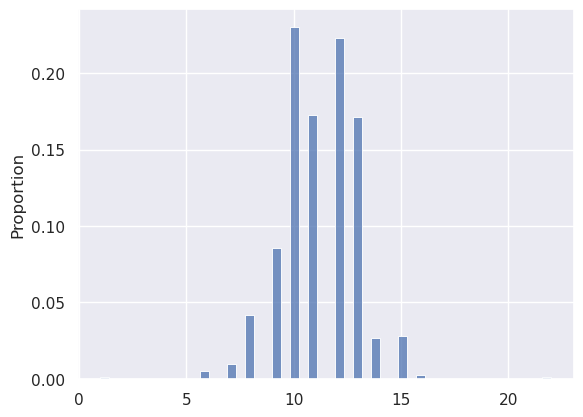

In [74]:
from enum import unique


def count_zinc_finger(filtered_sequences: List[SeqRecord], finger_length: int = 28) -> List[int]:
    # List comprehension to calculate the number of zinc fingers per sequence
    return [len(record.seq) // finger_length for record in filtered_sequences]  # Integer division

zinc_finger_length = count_zinc_finger(filtered_records)

sns.set_theme(style="darkgrid",       )
zinc_finger_dist = sns.histplot(zinc_finger_length, stat="proportion")

In [ ]:
def group_exact_sequences(filtered_sequences: SeqRecord) -> dict[str, List[str]]: 
    """The function does the following:
    1. Make a set of unique sequences
    2. initialize a empty dictionary with unique sequences as keys
    3. add sequence id that have that sequence as a list value to that dictionary
    """
    unique_sequences: set[str] = {str(record.seq) for record in filtered_sequences}
    
    sequence_groups: dict[str, list[str]] ={sequence : [] for sequence in unique_sequences}
    
    for record in filtered_sequences:
        sequence = str(record.seq)
        sequence_groups[sequence].append(record.id)
    
    return sequence_groups
grouped_ids = group_exact_sequences(filtered_records)  

['PMC4060951_AB843958.1_Mus_musculus_musculus_MG3025_mus',
 'PMC4060951_AB843969.1_Mus_musculus_musculus_MG3044_mus',
 'PMC4060951_AB843986.1_Mus_musculus_musculus_MG3054_mus',
 'PMC7743643_MT252949.1_Mus_musculus_musculus_strain_SKA_Prdm9-msc4_mus']

In [100]:
second_zf = [key[:28] for key in grouped_ids.keys()]
second_zf

['PYVCRECGRGFTQKSDLIKHQRTHTGEK',
 'PYVCRECGRGFTQKSHLIQHQRTHTGEK',
 'PYVCRECGRGFTAKSSLVQHQRTHTGEK',
 'PYVCRECGRGFTQKSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQKSSLIQHQRTHTGEK',
 'PYVCRECGRGFTQKSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQNSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQNSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQKSDLIKHQRTHTGEK',
 'PYVCRECGRGFTQKSDLIKHQRTHTGEK',
 'PYVCRECGRGFTAKSNLIQHQRTHTGEK',
 'PYVCRECGRGFTQKSDLIKHQRTHTGEK',
 'PYVCRECGRGFTQNSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQNSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQNSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQNSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQKSVLIKHQRTHTGEK',
 'PYVCRECGRGFTQNSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQNSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQKSNLIQHQRTHTGEK',
 'PYVCRECGRGFTQKSDLIKHQRTHTGEK',
 'PYVCRECGRGFTQNSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQKSNLIQHQRTHTGEK',
 'PYVCRECGRGFTQNSHLIQHQRTHTGEK',
 'PYVCRECGRGFIQKSNLIQHQRTHTGEK',
 'PYVCRECGRGFTQKSDLIKHQRTHTGEK',
 'PYVCRECGRGFTQNSHLIQHQRTHTGEK',
 'PYVCRECGRGFTQKSSLIQHQRTHTGEK',
 'PYVCRECGRGFTAKSNLIQHQRTHTGEK',
 'PYVCRECGRGFTQKSNLIQHQRTHTGEK',
 'PYVCRECG